In [1]:
%load_ext autoreload
%autoreload 2

In [7]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import setting
from sklearn import set_config
from sklearn.model_selection import check_cv
from sklearn.utils import indexable

from src import config
from src.common import util, viz
from src.features import dump_features, load_features

In [8]:
sns.set_theme(style="whitegrid")

In [9]:
features = [
    "cont1",
    "cont2",
    "cont3",
    "cont4",
    "cont5",
    "cont6",
    "cont7",
    "cont8",
    "cont9",
    "cont10",
    "cont11",
    "cont12",
    "cont13",
    "cont14",
]

In [10]:
df_train = load_features(
    features + ["target"],
    "train",
)

[DEBUG]2023-01-23 15:36:56,163:src.features:Load features.


In [13]:
df_train.head()

,cont1,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,cont14,target
0,0.670390,0.811300,0.643968,0.291791,0.284117,0.855953,0.890700,0.285542,0.558245,0.779418,0.921832,0.866772,0.878733,0.305411,7.243043
1,0.388053,0.621104,0.686102,0.501149,0.643790,0.449805,0.510824,0.580748,0.418335,0.432632,0.439872,0.434971,0.369957,0.369484,8.203331
2,0.834950,0.227436,0.301584,0.293408,0.606839,0.829175,0.506143,0.558771,0.587603,0.823312,0.567007,0.677708,0.882938,0.303047,7.776091
3,0.820708,0.160155,0.546887,0.726104,0.282444,0.785108,0.752758,0.823267,0.574466,0.580843,0.769594,0.818143,0.914281,0.279528,6.957716
4,0.935278,0.421235,0.303801,0.880214,0.665610,0.830131,0.487113,0.604157,0.874658,0.863427,0.983575,0.900464,0.935918,0.435772,7.951046


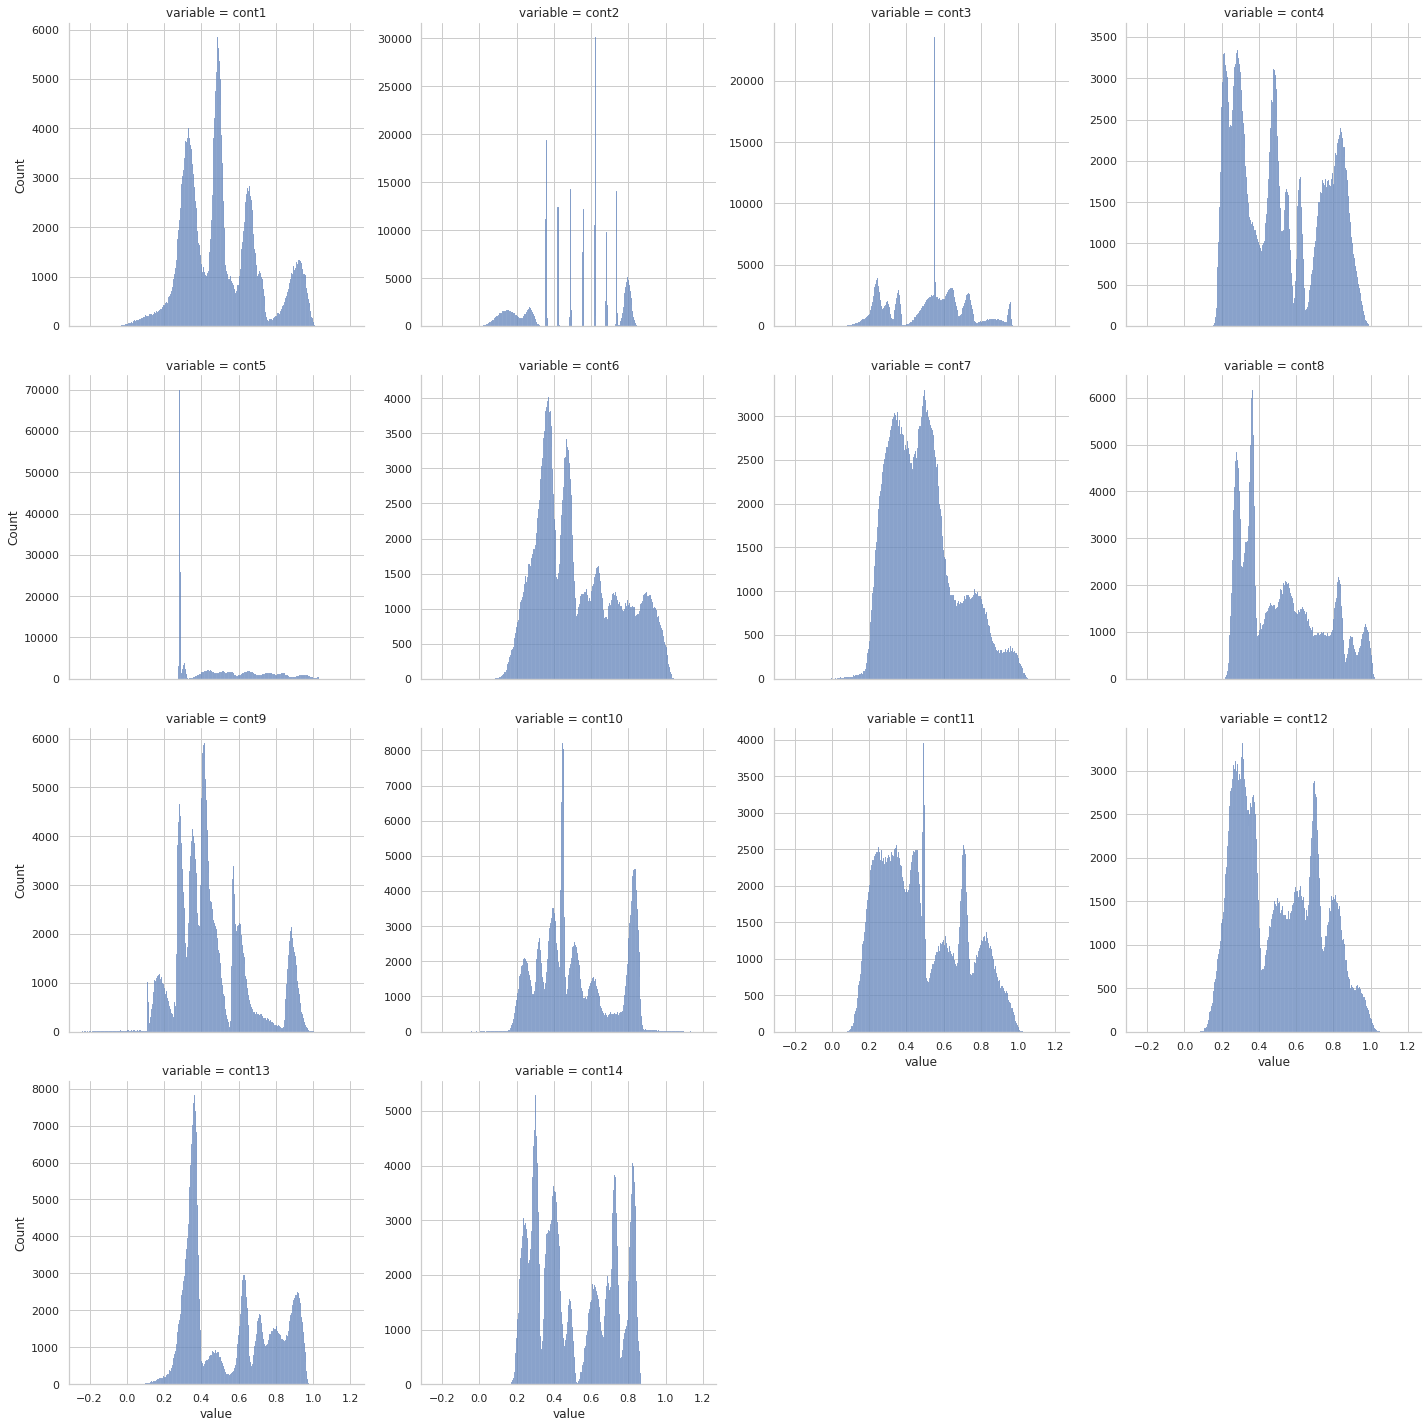

In [17]:
sns.displot(
    data=df_train[features].melt(),
    x="value",
    col="variable",
    col_wrap=4,
    facet_kws={"sharey":False},
);

In [33]:
df_train.assign(
    row_mean=df_train[features].mean(axis=1),
    row_std = df_train[features].std(axis=1),
).corr()

,cont1,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,cont14,target,row_mean,row_std
cont1,1.000000,-0.080170,-0.419712,0.273705,-0.059012,0.698556,0.341478,0.373340,0.794003,0.725040,0.565717,0.600041,0.570382,0.067294,-0.032994,0.742842,0.283107
cont2,-0.080170,1.000000,0.334487,-0.005533,0.150737,0.023692,0.116222,0.081049,-0.046769,0.035101,0.126024,0.092642,0.017383,0.023972,0.067102,0.264464,-0.031454
cont3,-0.419712,0.334487,1.000000,-0.329131,0.060931,-0.300509,0.106904,-0.309783,-0.406743,-0.289756,-0.075415,-0.103735,-0.386521,-0.065457,0.058936,-0.171184,-0.135458
cont4,0.273705,-0.005533,-0.329131,1.000000,0.123526,0.152752,-0.077045,0.324784,0.261927,0.204139,0.063961,0.073291,0.155226,0.054703,0.005522,0.328181,0.258110
cont5,-0.059012,0.150737,0.060931,0.123526,1.000000,-0.179084,-0.241272,0.010438,-0.071764,-0.102531,-0.222244,-0.192571,-0.140272,0.040552,-0.005358,0.034835,0.070314
cont6,0.698556,0.023692,-0.300509,0.152752,-0.179084,1.000000,0.541975,0.415008,0.716613,0.770628,0.737495,0.757105,0.783604,0.067007,0.027955,0.844581,0.313626
cont7,0.341478,0.116222,0.106904,-0.077045,-0.241272,0.541975,1.000000,0.150403,0.341759,0.465418,0.672188,0.657310,0.322415,-0.037135,0.067234,0.579533,0.189456
cont8,0.373340,0.081049,-0.309783,0.324784,0.010438,0.415008,0.150403,1.000000,0.429986,0.362336,0.296598,0.323042,0.475072,0.100645,0.014698,0.560576,0.314860
cont9,0.794003,-0.046769,-0.406743,0.261927,-0.071764,0.716613,0.341759,0.429986,1.000000,0.725053,0.575095,0.605091,0.628391,0.081992,-0.013029,0.767996,0.316914
cont10,0.725040,0.035101,-0.289756,0.204139,-0.102531,0.770628,0.465418,0.362336,0.725053,1.000000,0.677570,0.701872,0.650809,0.047727,-0.021143,0.813558,0.293042
